In [75]:
%reload_ext autoreload

%autoreload 2


In [78]:
input_file = "../../test_data/system_tests/diann_charite_dataset/Charite-DIA-NN_analysis.txt"
#input_file = "../../test_data/system_tests/diann_charite_dataset/Charite-DIA-NN_analysis.txt.diann_precursor_filename_sampleid.aq_reformat.tsv"

directlfq_file = "../../test_data/system_tests/diann_charite_dataset/Charite-DIA-NN_analysis.txt.protein_intensities.tsv"

samplemap ="../../test_data/system_tests/diann_charite_dataset/samplemap_shortened.tsv"

diann_lfq_file = "../../test_data/system_tests/diann_charite_dataset/Charite-DIA-NN_analysis.txt.diann_gene.aq_reformat.tsv"
iq_lfq_file = "../../test_data/system_tests/diann_charite_dataset/report-charite-iq.tsv"

run_directlfq = True

In [101]:
if run_directlfq:
    import directlfq.lfq_manager as lfqmgr

    lfqmgr.run_lfq(input_file=input_file, input_type_to_use="diann_fragion_isotopes_raw_charite_dataset", min_nonan=3)



/Users/constantin/workspace/directlfq/directlfq/utils.py:696: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/constantin/workspace/directlfq/directlfq/configs/intable_config.yaml' mode='r' encoding='UTF-8'>
  config_dict = load_config(INTABLE_CONFIG)


using input type diann_fragion_isotopes_raw_charite_dataset
to few values for normalization without missing values. Including missing values
prot 100 of 394
prot 200 of 394
prot 300 of 394


In [102]:

import directlfq.benchmarking as lfqbenchmark
restable_directlfq = lfqbenchmark.ResultsTableBiological(results_file=directlfq_file, samplemap=samplemap, name="directLFQ")
cvinfo_directlfq = lfqbenchmark.CVInfoDataset(restable_directlfq)

In [103]:
import directlfq.benchmarking as lfqbenchmark
restable_diann = lfqbenchmark.ResultsTableBiological(results_file=diann_lfq_file, samplemap=samplemap, name = "maxLFQ_DIANN")
cvinfo_diann = lfqbenchmark.CVInfoDataset(restable_diann)

In [104]:
import directlfq.benchmarking as lfqbenchmark
restable_iq = lfqbenchmark.ResultsTableBiological(results_file=iq_lfq_file, samplemap=samplemap, name = "maxLFQ_iQ")
cvinfo_iq = lfqbenchmark.CVInfoDataset(restable_iq)

27 are very large for directLFQ
1787
0.13934167725429727
0.1108909599431441
50 are very large for maxLFQ_DIANN
1982
0.1632490777950846
0.13240989113091897
10 are very large for maxLFQ_iQ
1698
0.13798939045114358
0.12633659011044102


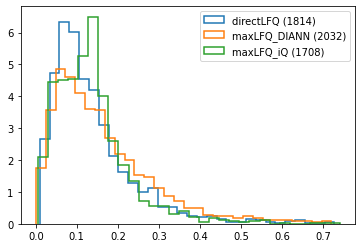

In [106]:
import matplotlib.pyplot as plt
ax = plt.subplot()
lfqbenchmark.CVDistributionPlotter(list_of_dataset_cv_infos=[cvinfo_directlfq, cvinfo_diann, cvinfo_iq], ax = ax,cumulative=False, density=True, bins=30)
ax.legend()
outfile = "../../test_data/system_tests/diann_charite_dataset/onefilt_density_true.pdf"
plt.savefig(outfile)
